# Introdução ao Pytorch e Conceitos Básicos

## Framework: O que é o Pytorch?

PyTorch é um framework de deep learning de código aberto desenvolvido pela Meta. Ele é usado para criar e treinar redes neurais, combinando a biblioteca de aprendizado de máquina Torch com uma API de alto nível em Python. É bastante popular na comunidade acadêmica e de pesquisa devido à sua flexibilidade e facilidade de uso.

### Outros frameworks
Veja uma comparação do Pytorch, Tensorflow e JAX [aqui](https://medium.com/@aranya.ray1998/ai-framework-face-off-choosing-between-tensorflow-pytorch-and-jax-5e26f5e60629)

### Como executar

1. Rodar localmente [instruções de instalação](https://pytorch.org/get-started/locally/)
2. Rodar no Colab, Kaggle, etc

In [2]:
import torch
import numpy as np
from torch.utils.data import Dataset
from torchvision import datasets 
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

## Tensores

Tensores são estruturas de dados semelhantes a arrays e matrizes, usadas no PyTorch para representar entradas, saídas e parâmetros de modelos. Diferem dos ndarrays do NumPy por poderem rodar em GPUs, compartilhar memória com arrays do NumPy e serem otimizados para diferenciação automática.

Podem ser criados de várias formas:

In [20]:
#inicializando direto do dado (o tipo é inferido automaticamente)
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


In [21]:
# A partir de um array numpy (e vice-versa)
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(x_np)

tensor([[1, 2],
        [3, 4]])


In [22]:
# A partir de outro tensor (herdando suas propriedades)
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 



In [23]:
x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Random Tensor: 
 tensor([[0.4535, 0.2429],
        [0.8204, 0.7010]]) 



In [24]:
#a partir de valores aleatorios ou constantes
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.5534, 0.1758, 0.7174],
        [0.5165, 0.9068, 0.3512]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


Podemos acessar o *shape*, *datatype* e *device* de um tensor:

In [25]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Operações em Tensores

Há mais de 1200 operações em tensores e são descritas [nesse link](https://pytorch.org/docs/stable/torch.html). 

Todas as operações podem ser executadas na CPU ou em algum acelerador (como CUDA). Por padrão, as operações são executadas na cpu. É necessário mover os tensores explicitamente para o acelerador disponível.

In [26]:
if torch.accelerator.is_available():
    gpu = torch.accelerator.current_accelerator()
    tensor = tensor.to(gpu)
    print(f"Tensor is now on: {tensor.device}")

Tensor is now on: cuda:0


In [27]:
#indexing e slicing
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0 # Zera a segunda coluna
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [35]:
tensor = torch.tensor([[1, 2],[3, 4],[5,6]])
print("Shape original:", tensor.shape)
#concatenando 
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print("Concatenando com .cat:",t1)
print(t1.shape)

#Empilhando
t2 = torch.stack((tensor, tensor, tensor), dim=0)
print("Empilhando com .stack:",t2)
print(t2.shape)

Shape original: torch.Size([3, 2])
Concatenando com .cat: tensor([[1, 2, 1, 2, 1, 2],
        [3, 4, 3, 4, 3, 4],
        [5, 6, 5, 6, 5, 6]])
torch.Size([3, 6])
Empilhando com .stack: tensor([[[1, 2],
         [3, 4],
         [5, 6]],

        [[1, 2],
         [3, 4],
         [5, 6]],

        [[1, 2],
         [3, 4],
         [5, 6]]])
torch.Size([3, 3, 2])


In [37]:
tensor = torch.ones(4, 4)
#Computa o produto matricial (y1, y2, y3 serão similares)
y1 = tensor @ tensor.T #.T é a matriz transposta
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)

tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]])

In [38]:
#Computa o produto elemento a elemento (z1, z2, z3 serão similares)
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

Tensores podem compartilhar memória com numpy arrays:

In [39]:
#transformando um tensor em numpy
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

# a mudança em t afeta n
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


### Tarefa
Crie um tensor 2D de tamanho 3x3 com números inteiros de 1 a 9, depois:

1. Some 10 a todos os elementos do tensor.
2. Multiplique o tensor resultante por 2.
3. Extraia a segunda coluna do tensor final.

In [ ]:
#seu código aqui

### resposta

In [ ]:
tensor =torch.tensor([ #poderia ser assim
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

tensor = torch.randint(low=1,high=9,size=(3,3))

# ou de qualquer forma que atenda o critério 3x3
print(tensor, tensor.shape)

tensor += 10
print(tensor)

tensor*=2
print(tensor)

print(tensor[:,1]) #seleciona a segunda coluna

tensor([[6, 5, 3],
        [4, 6, 8],
        [7, 7, 6]]) torch.Size([3, 3])
tensor([[16, 15, 13],
        [14, 16, 18],
        [17, 17, 16]])
tensor([[32, 30, 26],
        [28, 32, 36],
        [34, 34, 32]])
tensor([30, 32, 34])


## Datasets & DataLoaders

Para melhor legibilidade e modularidade, o PyTorch oferece duas primitivas: 
1. *torch.utils.data.Dataset*: armazena amostras e rótulos;
2. *torch.utils.data.DataLoader*: cria um iterador sobre o Dataset para facilitar o acesso aos dados.

Para ilustrar o uso das primitivas, vamos carregador o [Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/), um dataset com 60.000 amostras de treino e 10.000 de teste. Cada amostra é uma imagem 28x28 em escala de cinza e um rótulo associado de um das 10 classes disponíveis. 

Este é um dos datasets disponíveis no Pytorch que podem ser usados para prototipagem ou benchmarks. 

In [40]:
from torch.utils.data import Dataset
from torchvision import datasets 
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# datasets.FashionMNIST é uma classe derivada do torch.utils.data.Dataset
training_data = datasets.FashionMNIST(
    root="data", #caminho em que o dataset está / será armazenado
    train=True, #especifica se é treino ou teste
    download=True, #baixa o dado, se ele já não estiver no caminho em 'root'
    transform=ToTensor() #transformação nas features / labels 
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

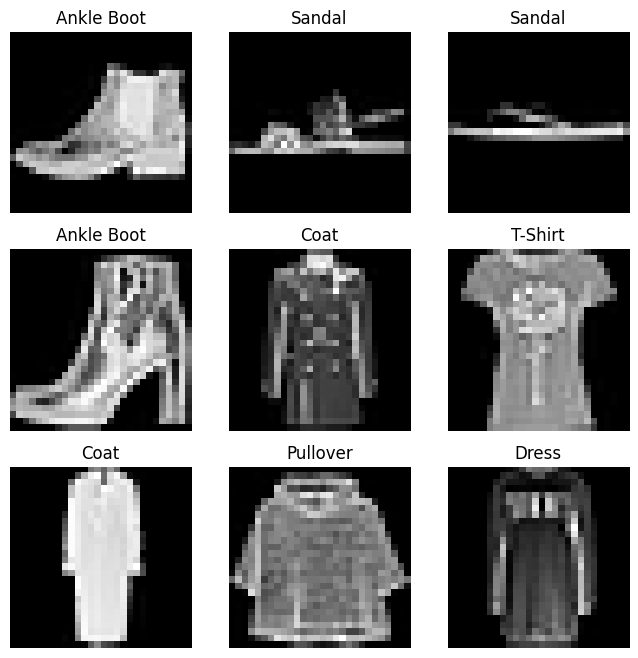

In [41]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Criando um dataset personalizado

Uma classe Dataset personalizada precisa implementar três funções: `__init__`, `__len__` e `__getitem__`.

No exemplo, as imagens do FashionMNIST ficam na pasta `img\_dir`, enquanto os rótulos estão em um arquivo CSV chamado `annotations\_file`.


In [ ]:
import os
import pandas as pd
from torchvision.io import decode_image

class CustomImageDataset(Dataset):
    #inicializa o dataset
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    #retorna o numero de amostras no dataset
    def __len__(self):
        return len(self.img_labels)

    #retorna uma amostra do dataset, dado o índice
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = decode_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

### DataLoader

O `Dataset` acessa as features e rótulos do conjunto de dados uma amostra por vez.

Durante o treino, geralmente enviamos os dados em *minibatches*, embaralhamos a cada época para reduzir *overfitting* e usamos *multiprocessing* para acelerar a leitura.

O `DataLoader` simplifica tudo isso, oferecendo uma API prática para lidar com essas tarefas automaticamente.


In [43]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Carregamos o dataset no `DataLoader** e podemos percorrê-lo conforme necessário.

Cada iteração retorna um lote de **train\_features** e **train\_labels** (com `batch_size=64` para cada um).

Como usamos `shuffle=True`, ao final de todas as iterações os dados são embaralhados novamente. Para mais controle sobre a ordem de carregamento, é possível usar [Samplers](https://docs.pytorch.org/docs/stable/data.html#data-loading-order-and-sampler).


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


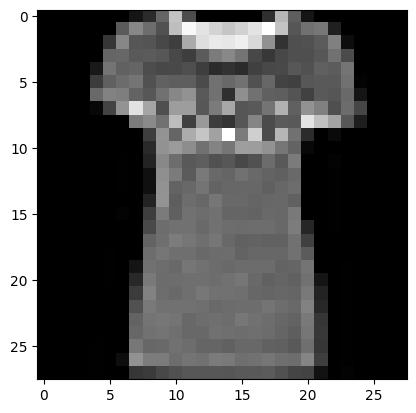

Label: 0


In [44]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

### Transformações

Os dados nem sempre chegam prontos para serem usados no treino. Por isso, usamos **transforms**, que aplicam manipulações nos dados para deixá-los adequados ao treinamento.

Nos datasets do TorchVision, há dois parâmetros:

* **transform**: modifica as *features*
* **target\_transform**: modifica os rótulos

Ambos recebem funções (*callables*) com a lógica de transformação. O módulo [`torchvision.transforms`](https://docs.pytorch.org/vision/0.11/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py) já oferece diversas transformações prontas.

No caso do FashionMNIST, as *features* estão em formato **PIL Image** e os rótulos são inteiros. Para treinar, precisamos das *features* como tensores normalizados e dos rótulos em formato *one-hot encoded*. Para isso, usamos **ToTensor** e **Lambda**.

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(), #converte uma imagem PIL ou ndarray para um FloatTensor e escala para [0, 1]
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

Podemos aplicar várias transformações aos dados. Em algumas aplicações, por exemplo, é comum realizar cortes, redimensionamentos, rotações e normalizações. Essas transformações podem ser combinadas usando **`Compose`**, como no exemplo abaixo.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0836544..2.5877128].


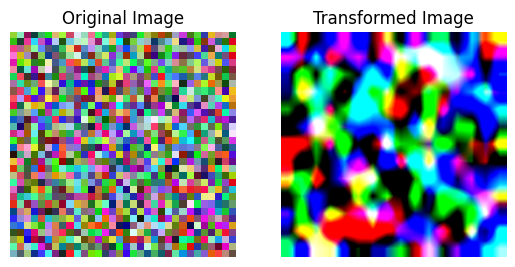

In [ ]:
from torchvision.transforms import v2

H, W = 32, 32
img = torch.randint(0, 256, size=(3, H, W), dtype=torch.uint8)

transforms = v2.Compose([
    v2.RandomResizedCrop(size=(224, 224), antialias=True),
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

timg = transforms(img)

fig, axs = plt.subplots(1,2)
axs[0].imshow(img.permute(1, 2, 0))
axs[0].set_title("Original Image")
axs[0].axis("off")
axs[1].imshow(timg.permute(1, 2, 0))
axs[1].set_title("Transformed Image")
axs[1].axis("off")
plt.show()

### Tarefa

1. Crie uma classe `SquaredDataset` que:

   * Gera tensores com números aleatórios de 0 a 10
   * No método `__getitem__`, retorne um tensor único empilhados:

     * O número original transformado em tensor.
     * O quadrado desse número (também tensor).

2. Instancie o dataset;

3. Use um DataLoader com `batch_size=5` e `shuffle=True`.

4. Verifique se sua função está correta printando o primeiro batch: `next(iter(dataloader))`

Experimente `shuffle=False` em outra célula e veja que o valor do primeiro batch nunca muda. 

In [ ]:
# seu código
dataloader = #seu código 
next(iter(dataloader))

### resposta 


In [ ]:
class SquaredDataset(Dataset):
    def __init__(self, size=20):
        # Gera tensores aleatórios entre 0 e 1, multiplica por 100 e converte para inteiro
        self.numbers = (torch.rand(size) * 100).int()

    def __len__(self):
        return len(self.numbers)

    def __getitem__(self, idx):
        num = self.numbers[idx]
        squared = num ** 2 
        return torch.stack([num, squared], dim=0)

dataset = SquaredDataset()
dataloader = DataLoader(dataset, batch_size=5, shuffle=True)

next(iter(dataloader))

<!-- #resposta 

class SquaredDataset(Dataset):
    def __init__(self, size=20):
        # Gera tensores aleatórios entre 0 e 1, multiplica por 100 e converte para inteiro
        self.numbers = (torch.rand(size) * 100).int()

    def __len__(self):
        return len(self.numbers)

    def __getitem__(self, idx):
        num = self.numbers[idx]
        squared = num ** 2 
        return torch.stack([num, squared], dim=0)

# Instancia o dataset
dataset = SquaredDataset()

# DataLoader com batch_size=5 e shuffle=True
dataloader = DataLoader(dataset, batch_size=5, shuffle=True)

next(iter(dataloader)) -->

## Criando uma Rede Neural

O namespace **torch.nn** oferece todos os componentes necessários para construir sua própria rede neural.

Todo módulo no PyTorch herda de **nn.Module**. Uma rede neural é um módulo que contém outros módulos (camadas).

Essa estrutura facilita a criação e o gerenciamento de arquiteturas complexas.

In [45]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

Verifica se algum acelerador (CUDA, MPS, MTIA, or XPU) está disponível, se não, usa a CPU:

In [46]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


Definimos nossa rede neural criando uma subclasse de **nn.Module** e inicializamos as camadas no método ****init****.

Toda subclasse de **nn.Module** implementa as operações sobre os dados de entrada no método **forward**.

In [47]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.flatten = nn.Flatten() #converte a imagem 28x28 em um vetor de 784 elementos
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512), #aplica uma transformacao linear usando os pesos e bias armazenados
            nn.ReLU(), #ativação não-linear
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

No exemplo, usamos `nn.Linear` para criar a função linear e `nn.ReLu`, mas existem vários outros módulos que podemos usar. Alguns exemplos:
1. Convolução 2D  `nn.Conv2d`
2. Max Pooling: `nn.MaxPool2d`

Veja todos os módulos disponíveis [aqui](https://docs.pytorch.org/docs/stable/nn.html)

Criamos um instancia e movemos para GPU. Depois, printamos a estrutura da rede:

In [48]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Para usar o modelo, passamos os dados de entrada a ele. Isso executa o método **forward**, junto com algumas operações internas. **Não chamamos model.forward() diretamente.**

Ao chamar o modelo com os dados, ele retorna um tensor 2D:

* dimensão 0 corresponde a cada saída do batch (exemplo: cada amostra)
* dimensão 1 contém os 10 valores brutos previstos para cada classe.

Para obter as probabilidades das previsões, aplicamos o tensor a uma instância do módulo **nn.Softmax**.

In [49]:
X = torch.rand(1, 28, 28, device=device) #dados 

logits = model(X) #logits
pred_probab = nn.Softmax(dim=1)(logits) #probabilidades
print("Probabilidades %",pred_probab*100)

y_pred = pred_probab.argmax(1) #classe prevista
print(f"Predicted class: {y_pred}")

Probabilidades % tensor([[ 9.6053,  9.4909, 10.8900,  9.9428,  9.9637, 10.4195, 10.4911,  9.6535,
          9.1678, 10.3755]], device='cuda:0', grad_fn=<MulBackward0>)
Predicted class: tensor([2], device='cuda:0')


Parâmetros do modelo:

In [ ]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0306,  0.0357,  0.0050,  ..., -0.0127, -0.0172, -0.0095],
        [ 0.0297,  0.0244, -0.0145,  ...,  0.0269,  0.0139,  0.0247]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0018, -0.0004], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0213,  0.0382, -0.0063,  ..., -0.0421, -0.0121, -0.0020],
        [-0.0239, -0.0347,  0.0159,  ..., -0.0207,  0.0245,  0.0099]],
       device='cuda:0', grad_fn=<Sl

Agora, precisamos treinar o modelo ou otimizar os parâmetros no dataset.

O treinamento de um modelo é um processo iterativo; em cada iteração, o modelo faz uma previsão, calcula o erro dessa previsão (loss), coleta os gradientes do erro em relação aos seus parâmetros (como vimos na seção anterior) e otimiza esses parâmetros usando o gradiente descendente.

### Hiperparâmetros  
Definimos os seguintes hiperparâmetros para o treinamento:

* **Número de Épocas**: quantas vezes o modelo vai passar por todo o conjunto de dados.
* **Tamanho do Batch**: quantidade de amostras processadas antes da atualização dos parâmetros.
* **Taxa de Aprendizado (Learning Rate)**: o quanto os parâmetros do modelo são ajustados a cada batch/época. Valores pequenos resultam em aprendizado lento; valores grandes podem causar comportamento instável durante o treino.


In [13]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

Quando apresentado a dados de treino, nosso modelo ainda não treinado provavelmente não dará a resposta correta. A função de perda mede o quanto o resultado obtido difere do valor esperado, e é essa função que queremos minimizar durante o treinamento.

Para calcular a perda, fazemos uma previsão com os dados de entrada e comparamos com o rótulo verdadeiro.

Funções de perda comuns são:

* `nn.MSELoss` (Erro Quadrático Médio) para tarefas de regressão.
* `nn.NLLLoss` (Log-Verossimilhança Negativa) para classificação.
* `nn.CrossEntropyLoss`, que combina `LogSoftmax` e `NLLLoss`.

Passamos os logits de saída do modelo para `nn.CrossEntropyLoss`, que normaliza esses valores e calcula o erro da previsão.


In [51]:
loss_fn = nn.CrossEntropyLoss()

Alternativamente, podemos definir nossa própria função de loss:

In [ ]:
def myCrossEntropyLoss(outputs, labels):
    batch_size = outputs.size()[0]            # tamanho do batch
    outputs = nn.functional.log_softmax(outputs, dim=1)   # calcula o log dos valores softmax
    outputs = outputs[range(batch_size), labels] # seleciona os valores correspondentes aos rótulos
    return -torch.sum(outputs)/batch_size #retorna 

### Otimizador

Otimização é o processo de ajustar os parâmetros do modelo para reduzir o erro a cada passo do treinamento. Os algoritmos de otimização definem como isso é feito (neste exemplo, usamos o Gradiente Descendente Estocástico — SGD).

Toda a lógica de otimização fica dentro do objeto **optimizer**. Aqui usamos o otimizador **SGD**, mas o PyTorch oferece vários outros, como **Adam** e **RMSProp**, que podem ser mais eficazes dependendo do modelo e dos dados.

Inicializamos o otimizador registrando os parâmetros do modelo que serão treinados e definindo a taxa de aprendizado (learning rate).


In [52]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Dentro do loop de treinamento, a otimização ocorre em três etapas:

1. Chame **optimizer.zero\_grad()** para zerar os gradientes dos parâmetros do modelo. Por padrão, os gradientes são acumulados; para evitar contagem dupla, zeramos explicitamente a cada iteração.

2. Faça a retropropagação da perda com **loss.backward()**. O PyTorch calcula e armazena os gradientes da perda em relação a cada parâmetro.

3. Com os gradientes calculados, chame **optimizer.step()** para atualizar os parâmetros conforme os gradientes obtidos.


### Loop de Treinamento

In [53]:
def loop_treino(dataloader, modelo, loss_fc, otimizador):
    tamanho = len(dataloader.dataset)
    # Define o modelo para modo de treino - importante para batch normalization e dropout
    # Não obrigatório aqui, mas usado como boa prática
    modelo.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        # Calcula a previsão e a perda
        pred = modelo(X)
        loss = loss_fc(pred, y)

        # Retropropagação
        loss.backward()
        otimizador.step()
        otimizador.zero_grad()

        if batch % 100 == 0:
            loss_val, atual = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss_val:>7f}  [{atual:>5d}/{tamanho:>5d}]")


def loop_teste(dataloader, modelo, loss_fc):
    # Define o modelo para modo avaliação - importante para batch normalization e dropout
    # Não obrigatório aqui, mas usado como boa prática
    modelo.eval()
    tamanho = len(dataloader.dataset)
    num_batches = len(dataloader)
    loss_test, acertos = 0, 0

    # Avaliar o modelo com torch.no_grad() evita cálculo de gradientes na fase de teste,
    # reduzindo uso desnecessário de memória e processamento
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = modelo(X)
            loss_test += loss_fc(pred, y).item()
            acertos += (pred.argmax(1) == y).type(torch.float).sum().item()

    loss_test /= num_batches
    acertos /= tamanho
    print(f"Erro no Teste: \n Acurácia: {(100*acertos):>0.1f}%, Perda média: {loss_test:>8f} \n")


In [54]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    loop_treino(train_dataloader, model, loss_fn, optimizer)
    loop_teste(test_dataloader, model, loss_fn)
print("Fim do treino")

Epoch 1
-------------------------------
loss: 2.290592  [   64/60000]
loss: 2.278581  [ 6464/60000]
loss: 2.270598  [12864/60000]
loss: 2.259864  [19264/60000]
loss: 2.244556  [25664/60000]
loss: 2.221074  [32064/60000]
loss: 2.199398  [38464/60000]
loss: 2.174265  [44864/60000]
loss: 2.172173  [51264/60000]
loss: 2.120455  [57664/60000]
Erro no Teste: 
 Acurácia: 38.7%, Perda média: 2.143500 

Epoch 2
-------------------------------
loss: 2.147146  [   64/60000]
loss: 2.144548  [ 6464/60000]
loss: 2.118434  [12864/60000]
loss: 2.092391  [19264/60000]
loss: 2.014893  [25664/60000]
loss: 2.024686  [32064/60000]
loss: 2.018489  [38464/60000]
loss: 1.969940  [44864/60000]
loss: 1.953713  [51264/60000]
loss: 1.914086  [57664/60000]
Erro no Teste: 
 Acurácia: 57.3%, Perda média: 1.869340 

Epoch 3
-------------------------------
loss: 1.862238  [   64/60000]
loss: 1.846935  [ 6464/60000]
loss: 1.747517  [12864/60000]
loss: 1.744692  [19264/60000]
loss: 1.751910  [25664/60000]
loss: 1.686395

## Diferenciação Automática

Ao treinar redes neurais, o algoritmo mais usado é o **backpropagation**. Nele, os parâmetros (pesos do modelo) são ajustados com base no gradiente da função de perda em relação a cada parâmetro.

Para calcular esses gradientes, o PyTorch conta com o motor de diferenciação automática chamado **torch.autograd**, que suporta o cálculo automático do gradiente para qualquer grafo computacional.

Considere uma rede neural simples de uma camada, com entrada **x**, parâmetros **w** e **b**, e uma função de perda. Ela pode ser definida em PyTorch da seguinte forma:

In [ ]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

Esse código define o grafo abaixo. Em que *w* e *b* são os parâmetros que precisamos otimizar. Ou seja, precisamos calcular gradientes da função de perda (*loss*) com respeito à estas variáveis. Para isso, setamos o valor da propriedade `requires_grad = True`. Também poderíamos fazer após a criação usando `w.requires_grad_(True)` 

![](https://docs.pytorch.org/tutorials/_images/comp-graph.png)

Para otimizar os pesos dos parâmetros na rede neural, precisamos calcular as derivadas da função de perda em relação aos parâmetros, ou seja,
$\frac{\partial loss}{\partial w}$ e $\frac{\partial loss}{\partial b}$, para valores fixos de $x$ e $y$.

Para calcular essas derivadas, chamamos **loss.backward()** e então acessamos os gradientes em **w\.grad** e **b.grad**.


In [ ]:
print(w.grad)
print(b.grad)

loss.backward()
print(w.grad)
print(b.grad)

None
None
tensor([[0.2057, 0.3167, 0.3274],
        [0.2057, 0.3167, 0.3274],
        [0.2057, 0.3167, 0.3274],
        [0.2057, 0.3167, 0.3274],
        [0.2057, 0.3167, 0.3274]])
tensor([0.2057, 0.3167, 0.3274])


Existem motivos para desativar o rastreamento de gradientes:

* Para marcar alguns parâmetros da rede neural como congelados (não atualizados).
* Para acelerar os cálculos quando estiver fazendo apenas a passagem forward, pois operações em tensores sem rastreamento de gradiente são mais eficientes.

Para desabilitar o tracking dos gradientes usamos o bloco `torch.no_grad()`. 


In [ ]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


ou então o método `detach()` 

In [ ]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


## Salvando e carregando modelos

Podemos salvar e carregar o modelo completo:

In [70]:
torch.save(model, 'model.pth')

#carregando modelo
torch.load('model.pth', weights_only=False) # isso irá carregar o modelo completo

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

Porém, a melhor prática é instanciar o modelo primeiro e depois carregar somente seus pesos:

In [71]:
# state_dict salva os parâmetros do modelo
torch.save(model.state_dict(), 'model_weights.pth') #salva somente os pesos do modelo

exemplo_model = NeuralNetwork()
exemplo_model.load_state_dict(torch.load('model_weights.pth', weights_only=True)) #carrega somente os pesos

<All keys matched successfully>

Também podemos usar a galeria de modelo do PyTorch. Por exemplo, poderíamos carregar o VGG16 e carregar os pesos IMAGENET1K_V1:

In [67]:
import torchvision.models as models

# model_vgg16 = models.vgg16(weights='IMAGENET1K_V1') #comentado pra não baixar os pesos

## Desafio

Agora, você irá definir e treinar uma CNN para classificar as imagens do Fashion-MNIST. 

Lembre-se da arquitetura da ConvNet padrão vista na última aula:

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/10/90650dnn2.webp)

Primeiro, carregue os dados e crie os DataLoaders com batchsize desejado:

Agora, defina a ConvNet:

Defina o loop de treinamento:

Por fim, instancie a loss e o otimizador e, depois, treine e avalie seu modelo:

Tudo que você precisa está disponível neste notebook. Tente fazer tudo antes de consultar na internet.

### Resposta:

Segue a implementação da ConvNet segundo a imagem. Todo o restante será igual ao que fizemos antes. 

In [ ]:
class ConvNet(nn.Module):

    def __init__(self):
        super().__init__()

        self.conv_layers = nn.Sequential(
            # Conv_1
            nn.Conv2d(in_channels=1, out_channels=8, kernel_size=5, padding=0),  # 28x28 -> 24x24
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),  # 24x24 -> 12x12

            # Conv_2
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5, padding=0),  # 12x12 -> 8x8
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)  # 8x8 -> 4x4
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(16 * 4 * 4, 64),   # fc_3
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(64, 10)           # fc_4 (output)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

Aqui eu defini n1 = 8 e n2 = 16 para as saídas das duas camadas convolucionais, e também defini 64 neurônios na camada totalmente conectada fc_3.
Essas foram escolhas minhas — o diagrama original não especifica esses valores.
Você pode testar outros parâmetros se quiser. Ao alterar esses valores, o número total de parâmetros da rede também muda (para mais ou para menos).
Experimente calcular quantos parâmetros a rede teria em cada configuração para entender o impacto dessas escolhas.